# Driven Damped Oscillator
$\textbf{Ryan}$ $\textbf{Dunagin:}$ dunaginryan@gmail.com

$\textbf{Jehanzeb}$ $\textbf{Chaudhry:}$ jehanzeb@unm.edu

Here we aim to compare two different ways of solving a popular problem in physics: $\textbf{The}$ $\textbf{Driven}$ $\textbf{Damped}$ $\textbf{Oscillator}$. Namely the system involves a mass, m, on a spring that follows $\textit{Hooke's}$ $\textit{Law}$ (with spring coefficent, k). The mass is also experiencing linear air resistance ($-\beta \dot{x}$) proportional to velocity; The dot derivative notation is used here. Therefor, we say it is damped. Finally, it is being driven by a sinusoidal force with magnitude, A, and frequency, $\omega$. All of these $\textbf{input}$ $\textbf{parameters}$ construct the following differential equation which we want to solve:

$$
\begin{equation}
\Large
m\ddot{x} + \beta \dot{x} + kx = Acos(wt)
\end{equation}
$$

Each selection of parameters gives a unique family of solutions to the differential equation. If we uniformly randomly generate these parameters (as we will do later), then we can run multiple simulations (Monti Carlo Simulations) on the well studied solution to the problem, both analytical and numerical. The purpose of this notebook is to demonstrate the utility of solving the differential equation this way. First, we must derive an analytical solution to this linear equation, as well as construct a numerical method to solve it. Then, before running simulations, these solutions should be compared to check for convergence as the step size in the numerical solutions, h, approaches 0.

## Complex Analysis: An Analytical Solution


The analytical solution to this $\textbf{Ordinary}$ (single-variate) $\textbf{Differential}$ $\textbf{Equation}$, ODE can be found using complex analysis. For those not yet familiar with complex numbers, we suggest visiting the following website:
http://hyperphysics.phy-astr.gsu.edu/hbase/oscdr.html 

The solution presented there is equivalent to the one being derived here.

Before considering initial conditions (which we must do later), to find the family of solutions to the equation, we can take advantage of the fact that all of the operators on position, save the cosine term, are linear operators. Because of this, it is common practice to find two solution under two situations. The $\textbf{homogeneous}$ solution (labeled $x_H$) is the solution to this ODE. 

$$
\begin{equation}
\Large
m\ddot{x} + \beta \dot{x} + kx = 0
\end{equation}
$$

This solution is also called the $\textbf{transient}$ solution, as it tends to decay to 0 over time, as we shall see. Naturally, this is how the system would behave if there were no driving forces involved. The second solution is called the $\textbf{non-homogeneous}$ solution, labeled $x_P$, and satisfies the original equation, accounting for the driving term. It is also called the $\textbf{steady}$ $\textbf{state}$ solution, since the system tends towards this solution after long enough time.

Starting simply, the transient solution can be found more easily by assuming an $\textbf{anzats}$, or educated guess at the solution. If we assume the solution (below) to be exponential, which can be easily differentiated, then we can apply it to the above equation. 

$
\begin{equation}
x = Ce^{rt}\\
\dot{x} = Cre^{rt}\\
\ddot{x} = Cr^2e^{rt}
\end{equation}
$

Doing so gets the following polynomial, which has 2 potentially complex roots.

$\begin{equation}
\large
mr^2 + \beta r + k = 0 \implies r = -\frac{\beta}{2m} \pm i\sqrt{\frac{k}{m} - \frac{\beta^2}{4m^2}}
\end{equation}
$

You'll notice that because the right side of the equation if 0, this polynomial conveniently doesn't need to include the exponential terms. Aren't homogenous solutions nice? Furthermore, we know what each component does for the solution. The real component, ($-\frac{\beta}{2m}$) is negative, so we know that this evokes exponential decay. We'll call the decay constant $\gamma$. The imaginary part of the exponent causes oscillations, according to euler's identity, so we'll call that $\omega_B$, or the natural frequency. As a side note, $\omega_0 \equiv \sqrt{\frac{k}{m}}$ will refer to the is the system's natural frequency $\textit{if}$ there were no damping involved. That is, if $\beta$ = 0 then $\omega_B = \omega_0$. The full homogeneous solution is:

$\begin{equation}
\large
x_H = e^{-\gamma}\Big[C_1 \cos(\omega_Bt) + C_2 \sin(\omega_Bt)\Big] \qquad \text{where} \ \omega_B^2 \equiv \frac{k}{m} - \frac{\beta^2}{4m^2} = \omega_0^2 - \gamma^2 
\end{equation}
$

Note that this solution is only valid in the $\textbf{underdamped}$ case. This means that $\beta \dot{x}$ is small enough to not overpower the springs restorative force. Conversely, if the system is overdamped, then the transient solution cannot oscillate at all, but only decay. In an elegant way, the solution is underdamped if and only if: 

$ \large \gamma^2 < \omega_0^2 = \frac{k}{m}$,

or equivalently:

$\large \beta^2 < 4km $

This is something we must verify in all cases, before passing our input parameters into our analytical solution. 

To derive the steady state solution, we must consider the following a complex anzats:

$
\begin{equation}
\large x = De^{i\omega t}
\end{equation}
$

The solving process is very similar to the above; We assume an exponential solution, but here we explicitly make it complex. The frequency, $\omega$, is chosen to match the driving frequency. This leaves us with D, a complex ceofficient, which we can solve for by differentiating our anzats twice and plugging it into the ODE. Given that the right hand side, RHS, of the ODE has a cosine, it's not immediately obvious how we are to neatly divide out all exponential terms, but we $\textit{can}$ do this here as well. Consider replacing $Acos(\omega t)$ with $Ae^{i\omega t}$. Because the cosine term is simply the real component of the RHS, we can solve for D and then simply consider the steady state solution, $x_p$, as the real component of our anzats:

$
\begin{equation}
\large
x_P = Re[De^{i\omega t}] = |D|\cos(\omega t + \psi)
\end{equation}
$

What is left to find is the magnitude of D and its phase on the complex plane, $\psi$. So let's do it! After cancelling out exponential terms we get a quadratic on $\omega$, which looks like this:

$
\begin{equation}
\large
-D\omega^2 + iD\frac{\beta}{m}\omega + D\omega_0^2 = \frac{A}{m} \implies \Large D = \frac{A}{m(\omega_0^2 - \omega^2 + i\frac{\beta}{\omega})}
\end{equation}
$

Therefore, it can be shown that the magnitude of D, calculated below as as "Dmod", and phase, calculated as psi, are respectively:

$
\begin{equation}
\Large
|D| = \frac{A}{m\sqrt{ (\omega_0^2 - \omega^2)^2 + (\frac{\beta}{\omega})^2 }} \qquad \psi = -\tan^{-1}(\frac{\beta \omega}{m(\omega_0^2 - \omega^2)})
\end{equation}
$

After finding both solutions, solving the initial value problem can be done by simply adding them together.

$
\begin{equation}
\large
x_G = x_P + x_H = e^{-\gamma}\Big[C_1 \cos(\omega_Bt) + C_2 \sin(\omega_Bt)\Big] + |D|\cos(\omega t + \psi)
\end{equation}
$

Because the ODE was of second order, we need two initial conditions to $\textit{uniquely}$ define a solution; That is, we can use known values of the initial position and velocity (x_0 and v_0 respectively) to solve for $C_1$ and $C_2$. Applying these conditions for t = 0, one can algebraically show that C1 and C2 are:

$C_1 = x_0 - |D|\cos(\psi) \qquad C_2\omega_B = v_0 + \gamma C_1 + |D|\omega\sin(\psi)$

It is interesting to note that the driving amplitude, A, does not appear in these coefficients, and does not affect the transient solution on its own. However, (and you can try this) if one were to just scale up A, x_0 and v_0, all by the same factor, then the resulting solution will take on the same form as the previous solution, but with all values scaled up by that factor!

The main thing to notice here is the fact that Dmod can become arbitrarily large, if (and only if) the system is driven at a frequency $\omega = \omega_B$ AND there is no damping ($\beta = 0$). In such a case, the system will oscillate at that frequency with an amplitude that continues to grow indefinately (in theory at least). This phenomenon is known as $\textit{resonance}$, and it can be studied further here by bringing w close to w_B. One must be careful however: This may cause the value Dmod might become too large to calculate on jupyter notebook. The system can still hit resonance even if there is damping. In that case, the finite $\textbf{amplitude}$ $\textbf{response}$ is calculated as the ratio Dmod/A. This ratio is always maximized at resonance. It can also be useful in determining whether or not you are in a situation akin to the Tacoma Narrows Bridge. (<1 and you are safe, but >1 and you had better start running!)

## Euler's Method: A Numerical Solution

In a much simpler way, Euler's method will be used to solve this ODE, given a pair of initial conditions, $x_0$ and $v_0$. Since this is a second order differential equation, we must perform Euler's method in parallel on both the position and velocity, labeled $y_1$ and $y_2$ respectively. In other words, we need a two step version of Euler's method. $y_1$ and $y_2$ slopes will be defined as follows:

$\begin{equation}
\dot{y_1}(t) = y_2(t) \qquad
\dot{y_2}(t) = \ddot{y_1}(t) = - \frac{\beta}{m}y_2 - \frac{k}{m}y_1 + \frac{A}{m}cos(wt)
\end{equation}$

It is well known that this method has an error between the numerical solution and true solution that is (at worst) proportional to h, the time stepsize. This is the same as saying the error is O($h$), or on the order of h. Although we know that Euler's method truncates off the terms that are O($h^2$), so we would expect the error evaluated closer to the initial conditions is O($h^2$). However, as we accumulate approximation errors up until the last point in time, t = b, the final error is degrades into O($h$). 

Our goal below is to compare the analytical and numerical solutions to study this final error. We aim to check for convergence between solutions and confirm that the error goes as O($h$) (that is, it has a positve linear relationship with h). To do this, we must vary the stepsize in time (h) and find multiple numerical solutions. All of this is done in our first comparison.

## Methods

In [52]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pyt
# Font sizes
pltsz = 8
pyt.rc('font',size=2.5*pltsz)
pyt.rc('xtick',labelsize=2*pltsz)
pyt.rc('ytick',labelsize=2*pltsz)
pyt.rc('axes',labelsize=2.5*pltsz)
pyt.rc('legend',fontsize=2*pltsz)

def run_analytical(m,beta,k,A,w,a,b,ta,x_0,v_0,frequencies = True):
    # Calculated Frequencies
    w_0 = np.sqrt(k/m) # Undamped freq
    w_B = np.sqrt(w_0**2 - (beta/2/m)**2) # Damped freq
    
    # Uncomment below to see behavior close to resonance 
    #w = w_B*0.95 
    
    #It is convenient to define Dmod as negative when driving above resonance, and positive otherwise
    if w < w_0:
        Dmod = A/m/np.sqrt( (w_0**2 - w**2)**2  + (beta*w/m)**2 )
    else:
        Dmod = -A/m/np.sqrt( (w_0**2 - w**2)**2  + (beta*w/m)**2 )
    
    if frequencies:
        # Amplitude response CAN GET LARGE IF AT RESONANCE AND UNDAMPED (beta = 0 and w = w_B)
        print(f'w_0 = {w_0}')
        print(f'w_B = {w_B}')
        print(f'w = {w}')
        print(f'The amplitude response ratio is: {Dmod/A}')

    psi = -np.arctan(beta*w/m/(w_0**2 - w**2)) # D phase
    gam = beta/(2*m) # decay constant
    C1 = x_0 - Dmod*np.cos(psi)
    C2 = v_0/w_B + gam*C1/w_B + Dmod*w/w_B*np.sin(psi) 
    
    # Transient + Steady State Soln
    U = ( C1*np.cos(w_B*ta) + C2*np.sin(w_B*ta) )*np.exp(-gam*ta) + Dmod*np.cos(w*ta + psi)
    # Final Value
    Ufin = U[-1]
    return U, Ufin

# Defining a Numerical solution using Euler's method   
def eulers_method(m,beta,k,A,w,a,b,N,x_0,v_0,h):
    # Calculated Frequencies
    w_0 = np.sqrt(k/m) # Undamped freq
    w_B = np.sqrt(w_0**2 - (beta/2/m)**2) # Damped freq
    
    # Uncomment below to see behavior close to resonance 
    #w = w_B*0.95 
    
    y1 = np.zeros([N])
    y2 = np.zeros([N])
    y1p = np.zeros([N])
    y2p = np.zeros([N])
    t = np.linspace(a,b,N)
    
    #initialize
    y1[0] = x_0
    y2[0] = v_0
    
    # calculates numerical solution iteratively
    for i in range(N-1):
        y1p[i] = y2[i]
        y2p[i] = -beta/m*y2[i] - k/m*y1[i] + A/m*np.cos(w*t[i])
        y2[i+1] = y2[i] + h*y2p[i]
        y1[i+1] = y1[i] + h*y1p[i]
    y1fin = y1[-1]
    return y1, y1fin, t


## Simulating Parameters

After verifying convergence, it is interesting to uniformly, randomly sample the input parameters. Below, you may adjust the distributions on each parameter to the differential equation. By default we use the average values of each parameter distribution, but you may choose to change these as well, before verifying convergence. 

Good settings to start at for m, beta, and k are 1, 0.1, and 1 respectively. Increase beta to lower the resonance frequency and see the solution dampen out faster! Carefull: If beta is too large, compared to the other parameters, then the solution will become overdamped and won't solve. However, one may also choose to comment out the overdamped error statements and continue with chosen overdamped parameters, where they can later see the numerical solution cease to oscillate (as it should). Should you do this, the analytical solution will no longer be valid.

In [53]:
# Array of parameters to test the numerical solution: N random iterations
# Note: Other interesting settings for m, beta, and k are 0.1, 0.2, and 1 respectively
m_low = 0.5
m_high = 4.5
m = (m_low + m_high)/2

beta_low = 0.05
beta_high = 1.15
beta = (beta_low + beta_high)/2

k_low = 1.5
k_high = 5.5
k = (k_low + k_high)/2

A_low = 0.5
A_high = 5.5
A = (A_low + A_high)/2

w_low = 0.1
w_high = 1.2
w = (w_low + w_high)/2

# Checks the worst case scenario
if beta_high**2 >= 4*k_low*m_low:
    raise NameError('Overdamped cases exist')

N = 100000
def sample_hypercube(N):
    '''This function takes an N sized sample of parameters. Parameters are organised by collumns'''
    all_para = []
    all_para = np.reshape(all_para,[0,5])
    for i in range(N):
        para = np.random.uniform([m_low,beta_low,k_low,A_low,w_low],[m_high,beta_high,k_high,A_high,w_high])
        m_temp = para[0]
        beta_temp = para[1]
        k_temp = para[2]
        all_para = np.concatenate((all_para,np.reshape(para,[1,5])),axis=0)  
    return all_para

all_para = sample_hypercube(N)
        
p_avg = np.mean(all_para,axis = 0)
print('Mean Values of Parameter Distributions:'\
      f'\n m = {p_avg[0]} \n beta = {p_avg[1]} \n k = {p_avg[2]} \n A = {p_avg[3]} \n w = {p_avg[4]}')

Mean Values of Parameter Distributions:
 m = 2.498634969413526 
 beta = 0.5989970467948154 
 k = 3.5042242817679345 
 A = 2.995395767276128 
 w = 0.6488697815170975


## Comparing Solutions:

Below is the first error analysis, for varying h. Here, we will use only the mean values of the parameter distribution. Our goal is simply to prove an O($h$) relationship by plotting the solutions together along with the errors. We only plot one of the numerical solutions, so to change which numerical solution to plot, change "save_run", which is an index on the Num_pts array.

### Comparing Solutions with varying h:

w_0 = 1.1832159566199232
w_B = 1.1771151175649728
w = 0.65
The amplitude response ratio is: 0.40409354247486945
Final Value (Analytical):0.838169917397355
Final Value (Numerical):0.8381709267946138


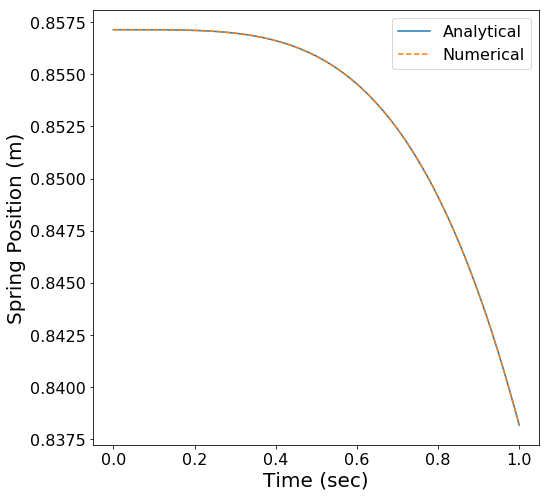

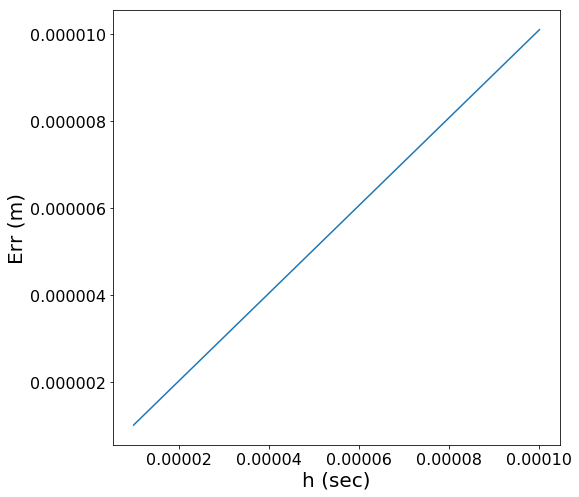

In [54]:
# Number of points to evalutate on each numerical solution
# Solution to IVP
#Initial conditions:
x_0 = A*2/7
v_0 = 0

# Time array
a = 0 # start
b = 1 # end
ta = np.linspace(a,b,10**5)

# Running Analytical Solution for the full time array
U, Ufin = run_analytical(m,beta,k,A,w,a,b,ta,x_0,v_0)

# Running Numerical Solution for different h values
Num_pts = np.round(np.linspace(10**4,10**5,5))
h_var = (b - a)/Num_pts
Err = np.zeros(len(h_var))
save_run = len(h_var) - 1 # save last run
#save_run = 0 # save first run

for j,h in enumerate(h_var):
    y1, y1fin, t = eulers_method(m,beta,k,A,w,a,b,int(Num_pts[j]),x_0,v_0,h)
    
    # Error in the numerical method when time t = b
    Err[j] = np.abs(y1fin - Ufin)
    
    if j == save_run:
        y_save = y1
        t_save = t

# plots the analytical soln and a saved numerical soln
pyt.figure(num = 1, figsize = (pltsz,pltsz))
pyt.plot(ta,U)
pyt.plot(t_save,y_save,'--')
pyt.legend(['Analytical','Numerical'])
pyt.xlabel('Time (sec)')
pyt.ylabel('Spring Position (m)')

# h and Err should have a positive linear relationship for sufficiently large N (about 10^5 or larger):  
pyt.figure(num = 2, figsize = (pltsz,pltsz))
pyt.plot(h_var,Err)
pyt.xlabel('h (sec)')
pyt.ylabel('Err (m)')

print(f'Final Value (Analytical):{Ufin}\nFinal Value (Numerical):{y1fin}')

### Numerical Solution randomly sampling different input parameters:

Here we attempt to compute the $\textbf{final}$ $\textbf{value}$, the position at t = b, using the uniform distribution of input parameters. This method is more analogous to what is used on real systems; typically we don't have a closed form for the solution to a differential equation. Also in science, any meaningful input parameter must have some uncertainty associated, and thus it should be represented as a distribution of values. Instead of directly solving the final value using the averages of the parameters (as done above), we can more accurately find N different final values with N sets of randomly chosen parameters; Then, in the spirit of the Monti Carlo Simulation, we can average these values to find a different final value. 

Allow me to breifly warn you against a naive idea: This value found by MC simulation is $\textit{not}$ necessarily the same value found using the averages of the parameters, and rightfully so. We cannot assume that, because the sample of parameters is uniform, the distribution of final values will also be uniform. The working anzats is not even uniform! So in the physical sense, the following simulated result would be the true final value to the ODE, if we were given the above uniform parameter distribution.

In [55]:
# Find E_true
E_mat = np.zeros([N,1])
for i in range(N):
    
    m_temp = all_para[i][0]
    beta_temp = all_para[i][1]
    k_temp = all_para[i][2]
    A_temp = all_para[i][3]
    w_temp = all_para[i][4]
    
    t_true = np.linspace(a,b,2)
    
    # Find Analytical Soln with each set of input parameters
    _, E_mat[i] = run_analytical(m_temp,beta_temp,k_temp,A_temp,w_temp,a,b,t_true,x_0,v_0,frequencies = False)

    
E_true = np.mean(E_mat, axis = 0)
print(f'Our true final value, using the analytical solution, for {N} samples is :{E_true}')



Our true final value, using the analytical solution, for 100000 samples is :[0.8394602]


Above we have calculated a "true value", labeled E_true; this is the final value of the analytical solution averaged over as many samples as Jupyter notebook can reasonably take. Below we define N as the number of parameter samples taken, and h as the step size in solving the numerical solution. We shall vary both and see their effects on the errors. Of course, the true value will be used to study just how error is affected by the choice of N and h, in our simulations. For this, we also define the following $\textbf{expectation}$ $\textbf{values}$:

$
\begin{equation}
\text{Let} \quad U(t = T) \equiv \text{Final Value from Analytical solution} \quad \text{and} \quad y_h(t = T) \equiv \text{Final Value from Numerical solution}
\end{equation}
$

$
\begin{align*}
\text{Then:}\\
\large E_{true} &= \large \underset{N \rightarrow \infty}{\lim} \frac{1}{N} \sum_{i = 1}^{N} U(T)\\
\large E_{N} &= \large \frac{1}{N} \sum_{i = 1}^{N} U(T)\\
\large E_{N,h} &= \large \frac{1}{N} \sum_{i = 1}^{N} y_h(T)\\
\end{align*}
$

Warning: The execution of the numerical solution may take a while depending on the size of h. Also, the sampling process can take a while on its own right. To mitigate the first issue, we will be using larger h values than previous used. To mitigate the latter, we won't use N values larger than $10^5$. The script should inform you when it has completed each set of simulations for each N.

In [56]:
# Redefining h array
#Num_pts = np.round(np.linspace(1000,2000,8))
Num_pts = np.array([2,5,10,20,50])
h_var = (b - a)/Num_pts

# Array of sample sizes
N_array = np.array([100,500,1000,2000])

E_table = np.zeros([len(N_array), (len(h_var) + 1)])

for row, N in enumerate(N_array):
    all_para = sample_hypercube(N)
    sol_mat = np.zeros([N,(len(h_var) + 1)])
    # The collumns of this matrix are ordered by solution type, 
    # from Analytical Solution to Euler's Method low h to Euler's method high h

    for i in range(N):

        m_temp = all_para[i][0]
        beta_temp = all_para[i][1]
        k_temp = all_para[i][2]
        A_temp = all_para[i][3]
        w_temp = all_para[i][4]

        t_true = np.linspace(a,b,2)

        # Find Analytical Soln with each set of input parameters
        _, sol_mat[i][0] = run_analytical(m_temp,beta_temp,k_temp,A_temp,w_temp,a,b,t_true,x_0,v_0,frequencies = False)

        # Similarly, Find Numerical Soln with each h value
        for j,h in enumerate(h_var):
            _, sol_mat[i][j + 1], _ = eulers_method(m_temp,beta_temp,k_temp,A_temp,w_temp,a,b,int(Num_pts[j]),x_0,v_0,h)


    sol_avg = np.mean(sol_mat, axis = 0)
    print(f'Done with N = {N}')
    E_table[row][:] = sol_avg

Done with N = 100
Done with N = 500
Done with N = 1000
Done with N = 2000


The total error on the numerical solution using Monti Carlo Simulation, or $T_{N,h}$, is the following:

$
\begin{align*}
T_{N,h} = E_{true} - E_{N,h} &= (E_{true} - E_N) + (E_N - E_{N,h})\\
&\equiv \qquad S_N \qquad + \qquad D_{h,N}\\
&= \qquad \text{Stochastic} + \text{Discretization}
\end{align*}
$

The total error can be broken down into are two types, as described above: Stochastic Error and Discritization Error. The stochastic error comes about randomly as we necessarily take N random samples of the parameters. It generally goes down as N increases, although it quickly becomes expensive to take larger orders of N samples. The discritization error is much easier to affect, how discrete our numerical solution is, due to h. We can usually mitigate this error by decreasing h, thereby making our solution "more continuous".

 

Text(0.5, 1.0, 'Discretization Error for N = 2000')

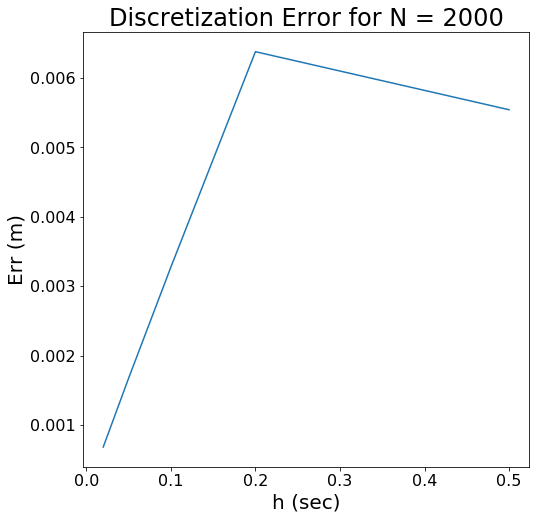

In [60]:
# Generating Error tables
S_table = np.zeros([len(N_array), len(h_var)])
D_table = np.zeros([len(N_array), len(h_var)])

# Calculates stochastic errors
S_array = abs( E_true*np.ones([len(N_array)]) - np.reshape(E_table[:,0],[len(N_array)]) )

for j in range(len(h_var)):
    S_table[:,j] = S_array
    D_table[:,j] = abs( E_table[:,0] - E_table[:,j+1] ) # calculates discretization errors

# Total Error
T_table = S_table + D_table

Nind = len(N_array) - 1 # index on N to display discretizaton error
pyt.figure(num = 3, figsize = (pltsz,pltsz))
pyt.plot(h_var,D_table[Nind,:])
pyt.xlabel('h (sec)')
pyt.ylabel('Err (m)')
pyt.title(f'Discretization Error for N = {N_array[Nind]}')

In [61]:
# Display Tables
from IPython.display import HTML, display

def round_matrix(table):
    round_table = table
    sigfigs = 2
    
    for i in range(np.size(table, axis=0)):
        for j in range(np.size(table, axis=1)):
            round_table[i,j] = str(round(table[i,j], -int(np.floor(np.log10(abs(table[i,j])))) + sigfigs)) 
    return round_table

S_round_table = round_matrix(S_table)
D_round_table = round_matrix(D_table)
T_round_table = round_matrix(T_table)

h_values = np.zeros([1,len(h_var)])
h_values = h_values.astype('str')
for i, h in enumerate(h_var):
    h_values[0,i] = "h = " + str(round(h, -int(np.floor(np.log10(abs(h)))) + 3))

N_values = np.zeros([len(N_array) + 1,1])
N_values = N_values.astype('str')
N_values[0] = ""
for i, N in enumerate(N_array):
    N_values[i+1,0] = "N = " + str(N) 

S_TABLE = np.concatenate((h_values,S_round_table), axis=0)
S_TABLE = np.concatenate((N_values,S_TABLE), axis=1)

D_TABLE = np.concatenate((h_values,D_round_table), axis=0)
D_TABLE = np.concatenate((N_values,D_TABLE), axis=1)

T_TABLE = np.concatenate((h_values,T_round_table), axis=0)
T_TABLE = np.concatenate((N_values,T_TABLE), axis=1)

print('Stochastic Errors')
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format(
               '</td><td>'.join(im for im in row)) for row in S_TABLE
           )
       )
))

print('Discretization Errors')
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format(
               '</td><td>'.join(im for im in row)) for row in D_TABLE
           )
       )
))

print('Total Errors')
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format(
               '</td><td>'.join(im for im in row)) for row in T_TABLE
           )
       )
))

Stochastic Errors


Discretization Errors


Total Errors
